# Question 1

In [24]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

users = pd.read_csv(url, sep='|')

mean_age_per_occupation = users.groupby('occupation')['age'].mean()

male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').mean()).sort_values(ascending=False)

min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()

total_count_per_occupation = users.groupby('occupation')['gender'].count()
percentage_gender_per_occupation = users.groupby(['occupation', 'gender'])['gender'].count() / total_count_per_occupation * 100
''
print("Step 4 - Mean age per occupation ")
print(mean_age_per_occupation)
print("\n")

print("Step 5 - Male ratio per occupation from the most to the least")
print(male_ratio_per_occupation)
print("\n")

print("Step 6 - Minimum and maximum ages for each occupation")
print(min_max_ages_per_occupation)
print("\n")

print("Step 7 - Mean age for each combination of occupation and sex ")
print(mean_age_per_combination)
print("\n")

print("Step 8 - percentage of women and man for each occupation")
print(percentage_gender_per_occupation)
print("\n")

Step 4 - Mean age per occupation 
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Step 5 - Male ratio per occupation from the most to the least
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
s

# Question 2

In [29]:
import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

euro12 = pd.read_csv(url)

goals = euro12['Goals']

teams = euro12.shape[0]

columns = euro12.shape[1]

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline_s = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

yellow_cards = discipline['Yellow Cards'].mean()

teams_with_more_than_6_goals = euro12[euro12['Goals'] > 6]

teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

first_7_columns = euro12.iloc[:, :7]

all_columns_except_last_3 = euro12.iloc[:, :-3]

shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print("Step 4 - Goal column:")
print(goals)
print("\nStep 5 - Number of teams participated in the Euro2012:", teams)
print("\nStep 6 - Number of columns in the dataset:", columns)
print("\nStep 7 - Discipline DataFrame:")
print(discipline)
print("\nStep 8 - Sorted the teams by Red Cards, then to Yellow Cards :")
print(discipline_s)
print("\nStep 9 - Calculated the mean Yellow Cards given per Team :", yellow_cards)
print("\nStep 10 - Filtered teams that scored more than 6 goals:")
print(teams_with_more_than_6_goals)
print("\nStep 11 -Teams starting with G:")
print(teams_starting_with_G)
print("\nStep 12 - First 7 columns:")
print(first_7_columns)
print("\nStep 13 - All columns except the last 3:")
print(all_columns_except_last_3)
print("\nStep 14 - Shooting Accuracy of England, Italy, and Russia:")
print(shooting_accuracy)

Step 4 - Goal column:
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5 - Number of teams participated in the Euro2012: 16

Step 6 - Number of columns in the dataset: 35

Step 7 - Discipline DataFrame:
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia          

# Question 3

In [30]:
# Step 1
import numpy as np

# Step 2
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3
data = pd.concat([series1, series2, series3], axis=1)
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 4
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5
bigcolumn = pd.concat([series1, series2, series3], axis=0)

# Step 6
print("\nIs it true that it only goes until index 99?\n", bigcolumn.index.max() == 99)

# Step 7
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn.index = range(300)

print("\nReindexed bigcolumn so it goes from 0 to 299 :\n")
print(bigcolumn)



Is it true that it only goes until index 99?
 True

Reindexed bigcolumn so it goes from 0 to 299 :

0          3
1          3
2          3
3          3
4          2
       ...  
295    24492
296    16851
297    14916
298    14142
299    15674
Length: 300, dtype: int32


# Question 4

In [43]:
dataset_path = "C:/Users/chint/OneDrive/Desktop/BDAT/Data Programming/Data set 3/Wind.txt"
data = pd.read_table(dataset_path, sep="\s+")

data.index = pd.to_datetime(data.index)

def fix_year(x):
    return x.replace(year=1961)
data.index = data.index.map(fix_year)
  
data.index.name = None

nulls_per_location = data.isna().sum()
print("Number of Missing Values per Location:")
print(nulls_per_location)

total_values = data.count().sum()
print("\nTotal Number of Non-Missing Values:", total_values)

mean_all = data.mean().mean()
print("\nMean Windspeed Across All Locations and Times:", mean_all)

loc_stats = data.describe()
print("\nLocation Statistics:")
print(loc_stats)

day_stats = data.T.describe()
print("\n\n\nDay Statistics:")
print(day_stats)

jan_means = data[data.index.month==1].mean()
print("\n\n\nMean Windspeed in January for Each Location:")
print(jan_means)

yearly = data.resample('A').mean() 
print("\n\n\nYearly Downsampled Data:")
print(yearly)

monthly = data.resample('M').mean()
print("\n\n\nMonthly Downsampled Data:")
print(monthly)

weekly = data.resample('W-Mon').mean()
print("\n\n\nWeekly Downsampled Data:")
print(weekly)

weekly_crossloc = weekly.T.describe()
print("\n\n\nMin, Max, Mean, and Std across Locations for Each Week (First 52 Weeks):")
print(weekly_crossloc)

Number of Missing Values per Location:
Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total Number of Non-Missing Values: 98579

Mean Windspeed Across All Locations and Times: 14.299199599246556

Location Statistics:
                Yr           Mo           Dy          RPT          VAL  \
count  6574.000000  6574.000000  6574.000000  6568.000000  6571.000000   
mean     69.500304     6.523274    15.728628    12.362987    10.644314   
std       5.188131     3.448871     8.800335     5.618413     5.267356   
min      61.000000     1.000000     1.000000     0.670000     0.210000   
25%      65.000000     4.000000     8.000000     8.120000     6.670000   
50%      69.500000     7.000000    16.000000    11.710000    10.170000   
75%      74.000000    10.000000    23.000000    15.920000    14.040000   
max      78.000000    12.000000    31.000000    35.800000    33.370000   

              

# Question 5

In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(url, sep='\t')

print("Step 4 - first 10 entries ")
print(chipo.head(10))

num_observations = chipo.shape[0]
print("\nStep 5 - Number of observations:", num_observations)

num_columns = chipo.shape[1]
print("\nStep 6 - Number of columns:", num_columns)

print("\nStep 7 - Column names:", chipo.columns.tolist())

print("\nStep 8 - Index:", chipo.index)

most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("\nStep 9 - Most-ordered item:", most_ordered_item)

most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nStep 10 - Quantity of most-ordered item:", most_ordered_item_quantity)

most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("\nStep 11 - Most ordered item in choice_description:", most_ordered_choice)

total_items_ordered = chipo['quantity'].sum()
print("\nStep 12 - Total items ordered:", total_items_ordered)

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("\nStep 13 - Item price type after conversion:", chipo['item_price'].dtype)

revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nStep 14 - Revenue:", revenue)

num_orders = chipo['order_id'].nunique()
print("\nStep 15 - Number of orders:", num_orders)

avg_revenue_per_order = revenue / num_orders
print("\nStep 16 - Average revenue per order:", avg_revenue_per_order)

num_different_items = chipo['item_name'].nunique()
print("\nStep 17 - Number of different items sold:", num_different_items)

Step 4 - first 10 entries 
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3   

# Question 6

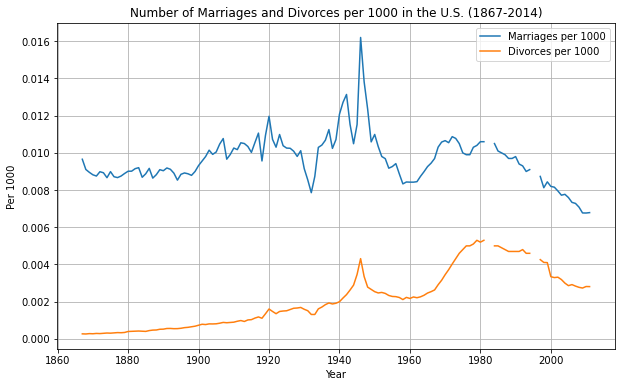

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

path = "C:/Users/chint/OneDrive/Desktop/BDAT/Data Programming/Data set 3/us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(path)
data['Marriages_per_1000'] = data['Marriages'] / data['Population']
data['Divorces_per_1000'] = data['Divorces'] / data['Population']
plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000')

plt.xlabel('Year')
plt.ylabel('Per 1000')
plt.title('Number of Marriages and Divorces per 1000 in the U.S. (1867-2014)')
plt.legend()

plt.grid(True)
plt.show()

# Question 7

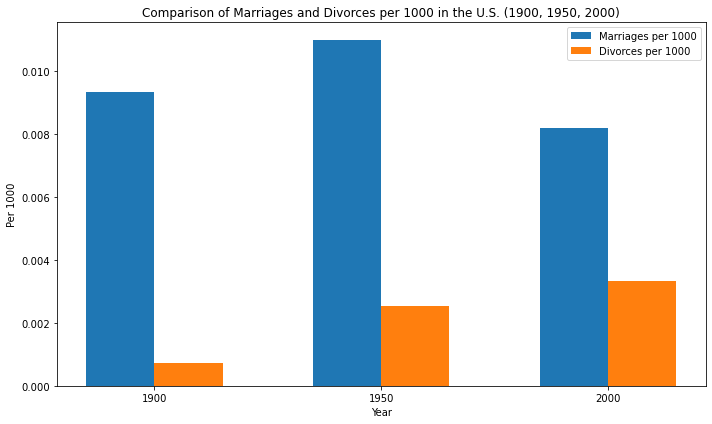

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
path = r"C:/Users/chint/OneDrive/Desktop/BDAT/Data Programming/Data set 3/us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(path)

# Filter data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_d = data[data['Year'].isin(years)].copy()

# Calculate per 1000 values using .loc indexer
filtered_d.loc[:, 'Marriages_per_1000'] = filtered_d['Marriages'] / filtered_d['Population']
filtered_d.loc[:, 'Divorces_per_1000'] = filtered_d['Divorces'] / filtered_d['Population']

# Create the vertical bar chart
plt.figure(figsize=(10, 6))

x = filtered_d['Year']
marriages_per_1000 = filtered_d['Marriages_per_1000']
divorces_per_1000 = filtered_d['Divorces_per_1000']

bar_width = 15
plt.bar(x - bar_width/2, marriages_per_1000, width=bar_width, label='Marriages per 1000')
plt.bar(x + bar_width/2, divorces_per_1000, width=bar_width, label='Divorces per 1000')

plt.xlabel('Year')
plt.ylabel('Per 1000')
plt.title('Comparison of Marriages and Divorces per 1000 in the U.S. (1900, 1950, 2000)')
plt.xticks(years)
plt.legend()

plt.tight_layout()
plt.show()

# Question 8

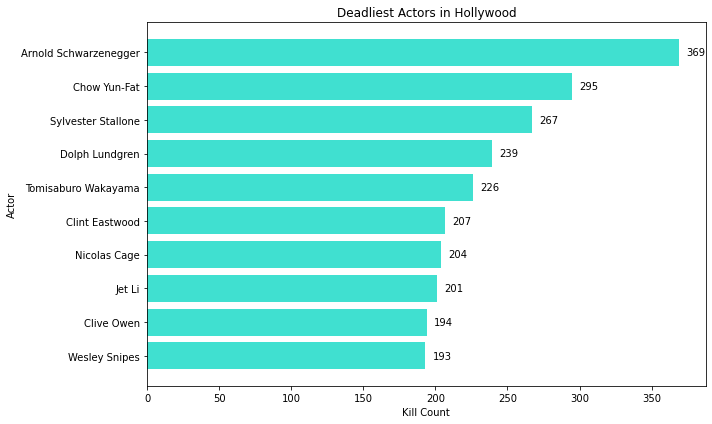

In [36]:
path = r"C:\Users\chint\OneDrive\Desktop/BDAT/Data Programming/Data set 3/actor_kill_counts.csv"
data = pd.read_csv(path)

sorted_data = data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='Turquoise')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()  # To display the highest value at the top

for i, value in enumerate(sorted_data['Count']):
    plt.text(value + 5, i, str(value), va='center')

plt.tight_layout()

plt.show()

# Question 9

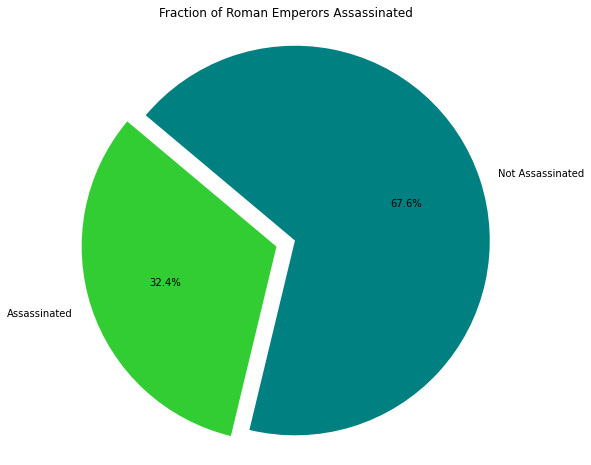

In [38]:
path = r"C:/Users/chint/OneDrive/Desktop/BDAT/Data Programming/Data set 3/roman-emperor-reigns.csv"
data = pd.read_csv(path)

# Calculate the number of emperors who were assassinated
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]

# Calculate the number of emperors who were not assassinated
non_assassinated_emperors = data.shape[0] - assassinated_emperors

# Create the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_emperors, non_assassinated_emperors]
colors = ['limegreen', 'Teal']
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal') 

plt.show()

# Question 10

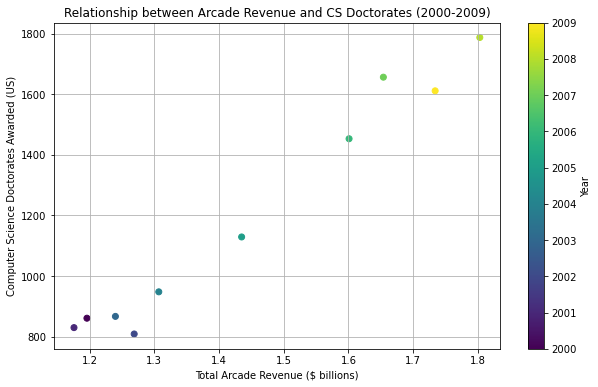

In [41]:
data_path = "C:/Users/chint/OneDrive/Desktop/BDAT/Data Programming/Data set 3/arcade-revenue-vs-cs-doctorates.csv"
df = pd.read_csv(data_path)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)'],c=df['Year'], cmap='viridis')
plt.colorbar(scatter, label='Year')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.xlabel('Total Arcade Revenue ($ billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.grid(True)

plt.show()